# Perception by dealing with Computer Vision
It's very important for robotics perception. Robot can be broken down into three essential step cycle.
    
    Perception >> Dicision >> Action
    
This notebook related with first step, **Perception**. For the task of perception we can use data from some kind of sensors like Lidor, Razor and Camera. The table of bellow compare some sensors. Here I use camera as eye ball for perception. 

    -----------------------------------------------------------------------------
    |     Sensor    ||    Spartial Resolution    |    Dimension    |    Cost    |
    |===============||===========================|=================|============|
    | Lidor + Razor ||           Low             |       3D        |  Expensive |
    |     Camera    ||           High            |       2D        |    Chea    |
    -----------------------------------------------------------------------------
Computer vision is art and science to percieving and understanding the world around us through images. In self driving cars it helps us to detect lane marking, other cars and pedestrians and so on to navigate safely our cars.

## Distortion Correction
##### Overview
Measure some of the quantities that need to be known in order to control the car. For example to steer car we need to measure how much your lane is curving. To do that I need to map out the lanes in my camera image, after transforming them to a different perspective. One way we are looking down on the road from above. In order to get this perspective transformation right, I first have to correct for the effect of image distortion.
Cameras don't create perfect images. Some of the object in the images, especially ones near the edges, can get stretched or skewed in various ways. So I need to correct distortions.

#####  What is Distortion? Why we need to undo distortions?
When a camera looks at 3D objects in the real world and transforms them into a 2D image. This transformation isn't perfect. Distortion is actuarry changing what the shape and size of these objects appears to be and closer or farther away than they actuarry are. This is a problem, because we're trying to accurately place the self-driving car in this world.

カメラの構造上、写真は歪みを持つ。自動運転車が実際の環境をありのまま認識できるようにするため、ここでは歪みを取り除く技術を学ぶ。

##### Types of Distortion
 - **Radial Distortion**(Introduced by camera lense)
 - **Tangental Distortion**(Introduced by not aligned perfectly parallel the camera's lens with the imaging plane)

---
**【歪み補正に必要なパラメータ】**
##### - Distortion Coefficitnts
Distortion can generally be captured by five numbers called distortion coefficients, whose values reflect the amount of radial and tangental distortion in an image. We can use them to calibrate our camera and undistort our images.

    Distortion coefficients = (k1, k2, p1, p2, k3)
In severely distorted cases, sometimes even more than five coefficients are required to capture the amount of distortion.

##### - Camera Matrix（もしくは内部パラメータとも呼ぶ Intrinsic Parameters）
カメラ固有のパラメータである、焦点距離(fx,fy)や光学中心(xc,yc)を3*3のマトリクスとして保持する。

                     fx,  0, xc
    CameraMatrix = [  0, fy, yc ]
                      0,  0,  1


　　Note: CameraMatrixはカメラの固定値なので、一度計算すればそれ以降は保存した値を使うことができる。

##### - Extrinsic Parameters（外部パラメータ）
座標系におけるある3次元点を別な座標系に変換する回転と並進のパラメータ。


Note: これらのパラメータを**推定**するため、ここではチェスボードの画像を用いる。チェスボードは、歪みがない場合にどう見えるかが想像できるのでこのタスクに適している（またコントラストがハッキリしているという点も優れている）。チェスボード上の制御点（ここでは四角形の角）を実空間と画像空間の両方において見つけ、その座標データをもとに歪みパラメータを算出する。実空間上の制御点はo-bject points、画像空間上の制御点はimage pointsを呼ぶ。3次元空間中での制御点(object points)は簡単に算出できるので、残るはimage pointsの取得ということになる。（参考：http://labs.eecs.tottori-u.ac.jp/sd/Member/oyamada/OpenCV/html/py_tutorials/py_calib3d/py_calibration/py_calibration.html#id5）

---
##### Math for Distortion Correction
To correct for **radial distortion** => **k1**, **k2**, and **k3**.
 - (x,y) is a point in a distorted image.
 - **r** which is calculated by OpenCV is the known distance between a point in an undistorted(corrected) image(xcorrected,ycorrected) and the center of the image distortion (xc, yc) as the distortion center（光学中心）.

Note: The distortion coefficient k3 is required to accurately reflect major radial distortion (like in wide angle lenses). However, for minor radial distortion, which most regular camera lenses have, k3 has a value close to or equal to zero and is negligible. So, in OpenCV, you can choose to ignore this coefficient; this is why it appears at the end of the distortion values array: [k1, k2, p1, p2, k3].

 - x_distorted = x_ideal(1 + k1 * r^2 + k2 * r^4 + k3 * r^6)
 - y_distorted = y_ideal(1 + k1 * r^2 + k2 * r^4 + k3 * r^6)

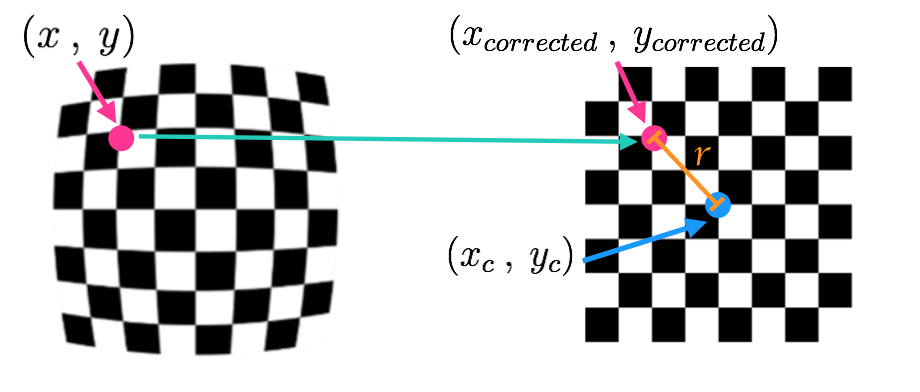
(image from Udacity)


To correct for **tangental distortion** => **p1**, **p2**.
 - x_corrected = x + [2p1xy + p2(r^2 + 2x^2)]
 - y_corrected = y + [p1(r^2 + 2y^2) + 2p2xy]


## Finding Corners
2次元画像上での制御点の位置(image points)を検出する。（参考：http://labs.eecs.tottori-u.ac.jp/sd/Member/oyamada/OpenCV/html/py_tutorials/py_calib3d/py_calibration/py_calibration.html#id6）
 - findChessboardCorners()
    The function attempts to determine wheather the input image is a view of the chessboard pattern and lokate the internal chessboard corners.
 - drawChessboardCorners()
    Renders the detected chessboard corners
---
**findChessboardCorners()**
##### Parameters
 - p1: source image of chessboard(must be an 8-bit grayscale or color image)
 - p2: patternSize the number of inner corners per a chessboard row and column
 - p3: corners which is output array of detected corners
 - p4: flags which can be zero or a combination of the following values
 
##### Returns
 - r1: 'true' if all of the corners are found and they are placed in a certain order. Otherwise, if the function fails to find all the corners or reorder them, it returns 'false'.
 - r2: corners the point of coordinate(x,y) detected
 
---
**drawChessboardCorners()**
##### Parameters
 - p1: image which is destination image.
 - p2: patternSize which is number of inner corners per a chessboard row and column
 - p3: corners which is output of findChessboardCorners()
 - p4: patternWasFound which is output of findChessboardCorners() for indicating wheather the complete board was found or not.
 
##### Returns
 - None

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

fname = 'images/calibration_test.png'
img = cv2.imread(fname)
origin = np.copy(img)

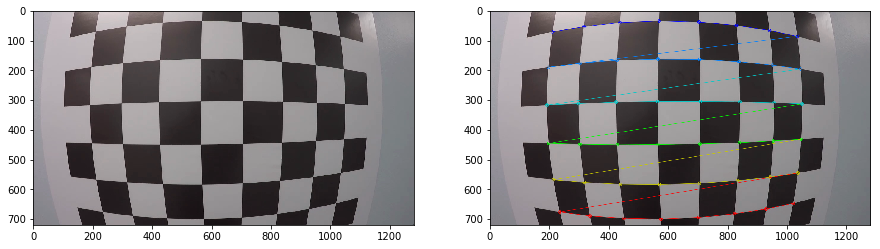

In [2]:
nx = 8
ny = 6

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)

if ret == True:
    cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
    fig = plt.figure(figsize=(15, 30))
    ax1 = fig.add_subplot(1,2,1)
    ax1.imshow(origin)
    ax2 = fig.add_subplot(1,2,2)
    ax2.imshow(img)
    plt.show()

## Calibrating a Camera
The first step will be to read in calibration images of a chessboard. It's recommended to use at least 20 images to ge a reliable calibration. Those images are taken at different angles and distances. 

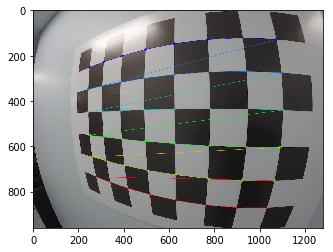

In [3]:
import glob

images = glob.glob('calibration_wide/GOPR*.jpg')
idx = 4
img = cv2.imread(images[idx])
origin = np.copy(img)

objpoints = [] # 3D points in real world space (x,y,z)
imgpoints = [] # 2D points in image plane (x,y)

# Prepare object points, like (0,0,0), (1,0,0), (2,0,0),...,(6,4,0)
objp = np.zeros((6*8, 3), np.float32)
objp[:,:2] = np.mgrid[0:8, 0:6].T.reshape((-1,2))

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, corners = cv2.findChessboardCorners(gray, (8, 6), None)

if ret == True:
    img = cv2.drawChessboardCorners(img, (8,6), corners, ret)
    objpoints.append(objp)
    imgpoints.append(corners)
    plt.imshow(img)

---
**calibrateCamera()**

制御点の3次元空間中での位置(object points)と2次元空間中での位置(image points)が分かったので、これをインプットにカメラキャリブレーションを行う。戻り値として、歪み補正に使う camera matrix, distortion coefficients, rotation(回転)・translation(並進)ベクトルが得られる。
##### Parameters
 - p1: objectPoints which is the 3D points in real world space.
 - p2: imagePoints which is the 2D points in image plane
 - p3: the shape of the image

##### Returns
 - r1: ret
 - r2: the camera matrix that we need to transform 3D object points to 2D image points
 - r3: distortion coefficients
 - r4: rotation vectors
 - r5: translation vectors

## Correcting for Distortion
**undistort()**
##### Parameters
 - p1: distorted image
 - p2: camera matrix
 - p3: distortion coefficients

##### Returns
 - r1: undistorted image often called "dst"

In [4]:
def cal_undistort(img, objpoints, imgpoints):
    ret, cmtx, distCoef, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img.shape[1::-1], None, None)
    undist = cv2.undistort(img, cmtx, distCoef)
    return undist

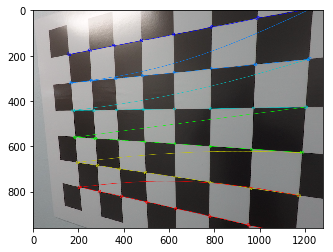

In [5]:
undistorted = cal_undistort(img, objpoints, imgpoints)
plt.imshow(undistorted)

### Motivation
Now that I've learned camera calibration and correcting distortion.

I can start to extract the really useful information of the road. One really important piece of imformation is lane curvature. Self-Driving cars need to be told the correct steering angle to turn left or right and We can calculate this angle if we know a few things about the speed and dynamics of the car and how much the lane is curving.

To determine the curvature, we'll go through the following steps.
 - Detect the lane lines using some masking and thresholding techniques.
 - Perform a perspective transform to get a birds eye view of the lane.
 - Extract the curvature the lanes from polynomial with just a little math.


    polynomial
        f(y) = Ay^2 + By + C
        
A gives the curvature of the lane line
B gives the heading or direction that the line is pointing
C gives the position of the line based on how far away it is from the very left of an image(y=0)

## Perspective Transform
### Purpose
- To measure **lane curvature**
- To get a view that looks more like a map representation

A perspective transform let's us change our perspective to view the same scene from different viewpoints and angles. This could be viewing a scene from the side of a camera, from the below the camera, or looking down on the road from above.

Doing a bird's eye view transform is especially helpful for road images because it will allow us to match a car's location directly with a map, since map's display roads and scenery from a top down view.

### How to transform a perspective?
 - First: select four points that define a rectangle on a plane in the image

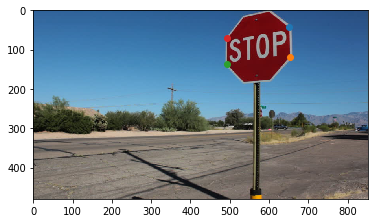

In [17]:
%matplotlib inline
img = mpimg.imread('./images/stopsign.jpg')
plt.imshow(img)

corners = [(652, 43), (), (492, 137), (493, 71)]
plt.plot(652, 43, 'o') # top-rght
plt.plot(653, 118, 'o')# bottom-right
plt.plot(492, 137, 'o')# bottom-left
plt.plot(493, 71, 'o') # top-left

---
**getPerspectiveTransform()**

Calculates a perspective transform from four pairs of the corresponding points.
##### Parameters
 - p1: src which is coordinates of quadrangle verticies in the source image
 - p2: dst which is coordinates of corresponding quadrangle verticies in the destination image
 - p3: solveMethod(optional)
##### Returns
 - r1: matrix of a perspective transform
 
---
**warpPerspective()**
 
 Applies a perspective transformation to an image.
 
##### Parameters
 - p1: src which is input image
 - p2: dst which is output image
 - p3: M which is 3*3 transformation matrix
 - p4: dsize which is size of the output image
 - p5: flags which is combination of interpolation methods(optional)
 - p6: borderMode which is pixel extrapolation method(optional)
 - p7: borderValue which is used in case of a constant border(optional)
##### Returns
 - r1: warped image

In [18]:
def warp(img):
    # Define calibration box in source and warped coordinates
    img_size = (img.shape[1], img.shape[0])
    
    # Four source coordinates
    src = np.float32(
        [[652, 43], 
          [653, 118],
          [492, 137],
          [493, 71]])
    
    # define a desired rectangle plane for the warped image
    # choose four different points that are where I want the source points to end up.
    # Four desired coordinates
    dst = np.float32(
        [[653, 71], 
          [653, 137],
          [493, 137],
          [493, 71]])
    
    # Compute the perspective transform, M
    M = cv2.getPerspectiveTransform(src, dst)
    Minv = cv2.getPerspectiveTransform(dst, src)
    
    warped = cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)
    return warped

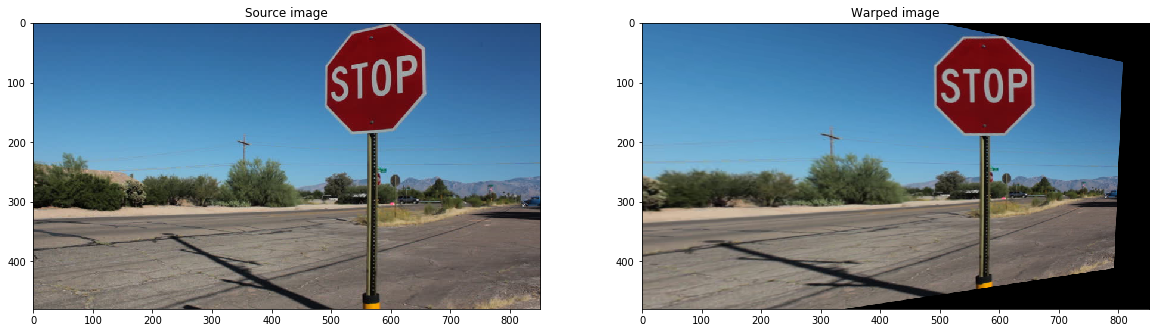

In [19]:
warped_img = warp(img)
f, (ax1, ax2) = plt.subplots(1,2,figsize=(20,10))
ax1.set_title('Source image')
ax1.imshow(img)
ax2.set_title('Warped image')
ax2.imshow(warped_img)